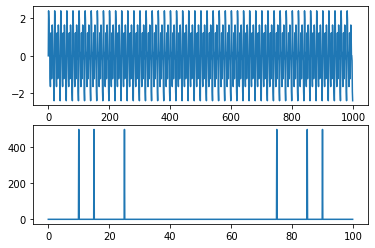

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a 1000-length list of data points with
# Time Parameters
x = []
sample_rate = 100
seconds = 10
total_steps = int(seconds*sample_rate)
for step in range(total_steps):
    value = 0
    value += np.sin((2 * np.pi * 10) * (1/sample_rate) * step) # f = 10 Hz
    value += np.sin((2 * np.pi * 15) * (1/sample_rate) * step) # f = 15 Hz
    value += np.sin((2 * np.pi * 25) * (1/sample_rate) * step) # f = 25 Hz
    x.append(value)

In [ ]:
# DFT Calculation

# What we want is X_k = sum(x_n * exp(-j*2*PI*k*n/N))
N = 1000
# Frequency Domain Array
X = []
for k in range(0, N):
	X.append(complex(0, 0))
	for n in range(0, N):
		X[k] += x[n] * np.exp(complex(0, -2 * np.pi * k * n/N))

# Plotting 
fig, ax = plt.subplots(2)
# Time plot
ax[0].plot(x)
# I only really care about magnitude, phase isn't really intuitive for this demo
# NOTE: sample_rate * step / N is the frequency.
#       T is the (number of samples) / (sample rate) = seconds (period)
#       Frequency is thus multiples of 1/T
ax[1].plot([sample_rate * step / N for step in range(total_steps)],[abs(i) for i in X])
plt.show()

In [ ]:
# FFT Calculation (Cooley and Tukey)

def fast_fourier_transform(x):
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = fast_fourier_transform(x[::2])
        X_odd = fast_fourier_transform(x[1::2])
        factor = \
          np.exp(complex(0, -2*np.pi*np.arange(N)/ N))
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X